In [31]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import dask.array as da
import xarray as xr


from xmitgcm import open_mdsdataset
import xmitgcm
import ecco_v4_py as ecco


from netCDF4 import Dataset

import seawater

from analysis_package import plotting_functions
from analysis_package import open_datasets
from analysis_package import derive_potential_density_values_TEST
from analysis_package import ecco_masks

from importlib import reload

# reload modules for prototyping...
ecco_masks = reload(ecco_masks)
plotting_functions = reload(plotting_functions)
open_datasets = reload(open_datasets)
derive_potential_density_values_TEST = reload(derive_potential_density_values_TEST)


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [32]:
import os
print(os.getcwd())

/Users/Tatsu1/Projects/pd_ECCO_overturning


In [200]:
output_data_dir = "./preliminary_results/"

atl_so_dic_x = {}
atl_so_dic_y = {}

atl_so_dic_interp_x = {}
atl_so_dic_interp_y = {}

atl_so_x = xr.open_dataset(output_data_dir+atl_latx_file).rename({"__xarray_dataarray_variable__":"psi_x"}).sum(dim="time")*0
atl_so_y = xr.open_dataset(output_data_dir+atl_laty_file).rename({"__xarray_dataarray_variable__":"psi_y"}).sum(dim="time")*0


for file in os.listdir(output_data_dir):
    
    if "atl_so" in file and "latx" in file:
        atl_so_dic_x[file] = xr.open_dataset(output_data_dir+file).rename({"__xarray_dataarray_variable__":"psi_x"}).sum(dim="time")
        atl_so_x = atl_so_x + atl_so_dic_x[file]
        
    elif "atl_so" in file and "laty" in file:
        atl_so_dic_y[file] = xr.open_dataset(output_data_dir+file).rename({"__xarray_dataarray_variable__":"psi_y"}).sum(dim="time")
        atl_so_y = atl_so_y + atl_so_dic_y[file]

    


In [201]:
print(atl_so_x)

<xarray.Dataset>
Dimensions:  (lat: 176, pot_rho: 51)
Coordinates:
  * lat      (lat) int64 -88 -87 -86 -85 -84 -83 -82 ... 81 82 83 84 85 86 87
  * pot_rho  (pot_rho) float64 1e+03 1.032e+03 1.032e+03 ... 1.038e+03 1.038e+03
Data variables:
    psi_x    (pot_rho, lat) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0


In [204]:
atl_overturning = (-1*atl_so_x.psi_x[1:,min_lat:max_lat] - 1*atl_so_y.psi_y[1:,min_lat:max_lat] )/288.


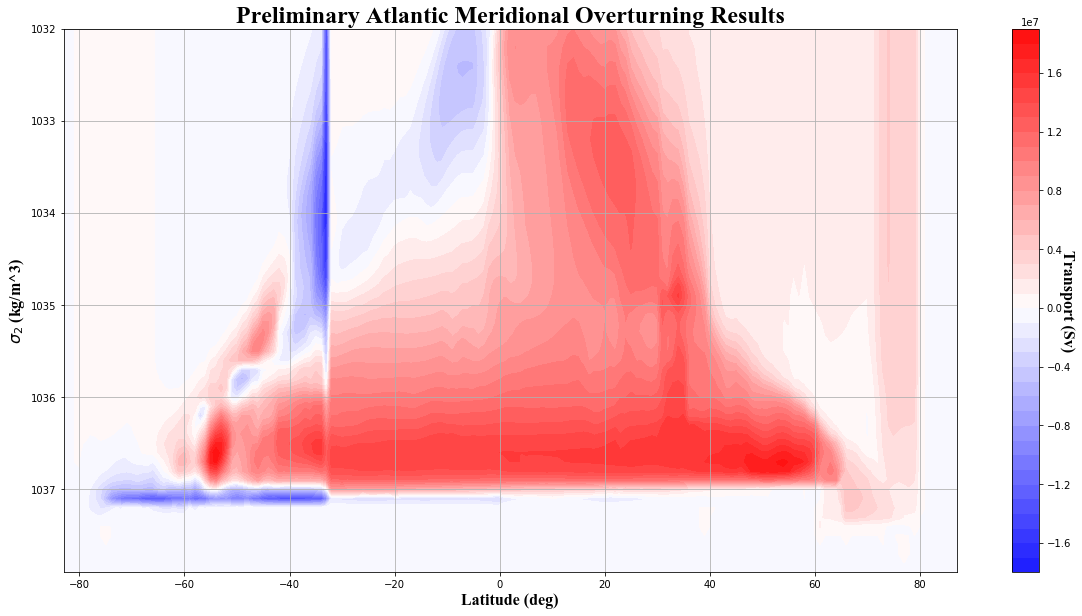

In [209]:
pvmin = -2e7
pvmax = 2e7

plt.figure(figsize=(20,10))

plt.contourf(atl_overturning.lat,
             atl_overturning.pot_rho,
             atl_overturning,
             40,
             cmap='bwr',
            vmin=pvmin,
            vmax=pvmax)
cbar = plt.colorbar()
cbar.set_label("Transport (Sv)",rotation=270)
"""
plt.contour(atl_so_x.lat[min_lat:max_lat],
             atl_so_x.pot_rho[1:],
             atl_overturning,
             20,
           colors="k")
"""
plt.title("Preliminary Atlantic Meridional Overturning Results",fontname='times new roman',fontsize=24)
plt.xlabel("Latitude (deg)",fontname='Times New Roman',fontsize=16)
plt.ylabel("$\sigma_{2}$ (kg/m^3)",fontname='Times New Roman',fontsize=16)
cbar.set_label("Transport (Sv)",fontname='Times New Roman',fontsize=16,rotation=270)
plt.grid()
plt.gca().invert_yaxis()
plt.savefig("./figures/preliminary_results.png")
plt.show()
plt.close()

In [182]:
min_lat = 5
max_lat = 178

atl_latx_file = "atl_so_depth_integrated_pdens_transport_latx_0_to_11.nc"
atl_laty_file = "atl_so_depth_integrated_pdens_transport_laty_0_to_11.nc"

atl_latx = xr.open_dataset(output_data_dir+atl_latx_file).rename({"__xarray_dataarray_variable__":"psi_x"}).mean(dim="time")
atl_laty = xr.open_dataset(output_data_dir+atl_laty_file).rename({"__xarray_dataarray_variable__":"psi_y"}).mean(dim="time")



In [183]:
atl_overturning = (-1*atl_latx.psi_x[1:,min_lat:max_lat] - 1*atl_laty.psi_y[1:,min_lat:max_lat] )


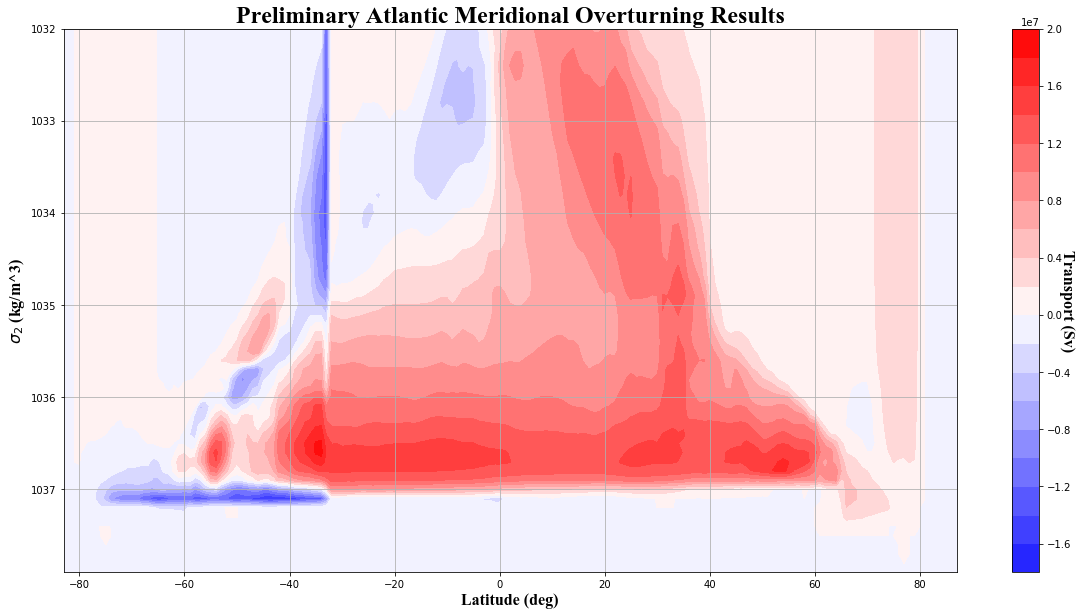

In [184]:
pvmin = -2e7
pvmax = 2e7

plt.figure(figsize=(20,10))

plt.contourf(atl_overturning.lat,
             atl_overturning.pot_rho,
             atl_overturning,
             20,
             cmap='bwr',
            vmin=pvmin,
            vmax=pvmax)
cbar = plt.colorbar()
cbar.set_label("Transport (Sv)",rotation=270)
"""
plt.contour(atl_so_x.lat[min_lat:max_lat],
             atl_so_x.pot_rho[1:],
             atl_overturning,
             20,
           colors="k")
"""
plt.title("Preliminary Atlantic Meridional Overturning Results",fontname='times new roman',fontsize=24)
plt.xlabel("Latitude (deg)",fontname='Times New Roman',fontsize=16)
plt.ylabel("$\sigma_{2}$ (kg/m^3)",fontname='Times New Roman',fontsize=16)
cbar.set_label("Transport (Sv)",fontname='Times New Roman',fontsize=16,rotation=270)
plt.grid()
plt.gca().invert_yaxis()
plt.savefig("./figures/southern_ocean_atlantic_overturning_with_interp.png")
plt.show()
plt.close()

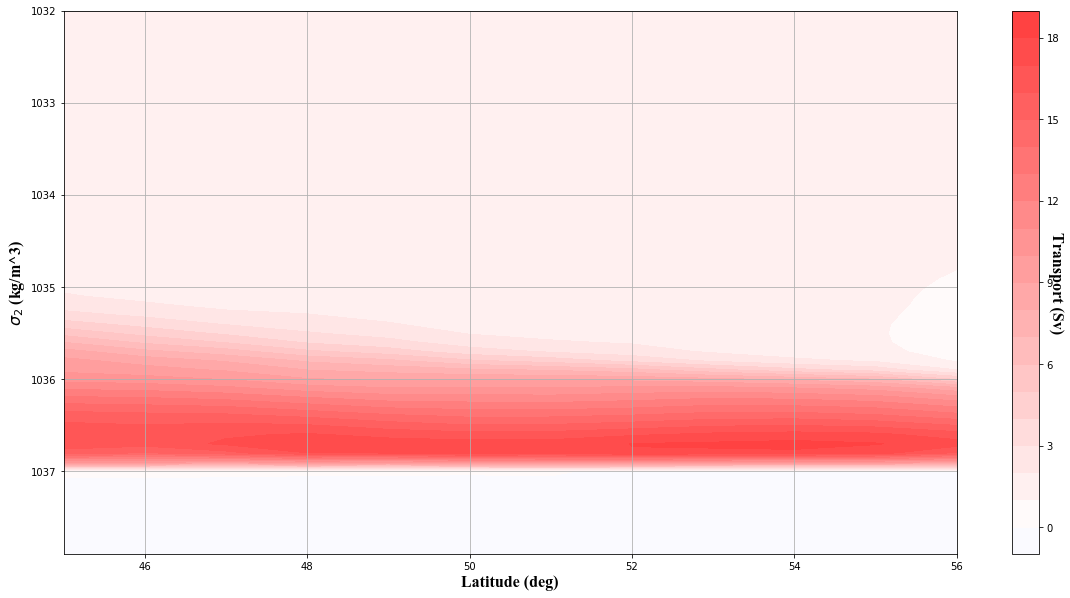

In [29]:
pvmin = -25
pvmax = 25

plt.figure(figsize=(20,10))

plt.contourf(atl_overturning.lat.isel(lat=slice(128,140)),
             atl_overturning.pot_rho,
             atl_overturning.isel(lat=slice(128,140)),
             20,
             cmap='bwr',
            vmin=pvmin,
            vmax=pvmax)
cbar = plt.colorbar()
cbar.set_label("Transport (Sv)",rotation=270)

plt.xlabel("Latitude (deg)",fontname='Times New Roman',fontsize=16)
plt.ylabel("$\sigma_{2}$ (kg/m^3)",fontname='Times New Roman',fontsize=16)
cbar.set_label("Transport (Sv)",fontname='Times New Roman',fontsize=16,rotation=270)
plt.grid()
plt.gca().invert_yaxis()
plt.savefig("./figures/southern_ocean_atlantic_overturning_with_interp.png")
plt.show()
plt.close()